Projet

# Projet Regression Linéaire simple sur les ventes des Glaces 

## Importation des bibliothèques et des données

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from jupyterthemes import jtplot 
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [4]:
sales_df = pd.read_csv('IceCreamData.csv')

## Exploration des données

In [5]:
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [6]:
sales_df.head(10)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338
9,31.669465,737.800824


In [7]:
sales_df.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352519
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [8]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [9]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [10]:
sales_df.min()

Temperature     0.0
Revenue        10.0
dtype: float64

In [11]:
sales_df.max()

Temperature      45.0
Revenue        1000.0
dtype: float64

In [12]:
sales_df.mean()

Temperature     22.232225
Revenue        521.570777
dtype: float64

## Visualisation des données

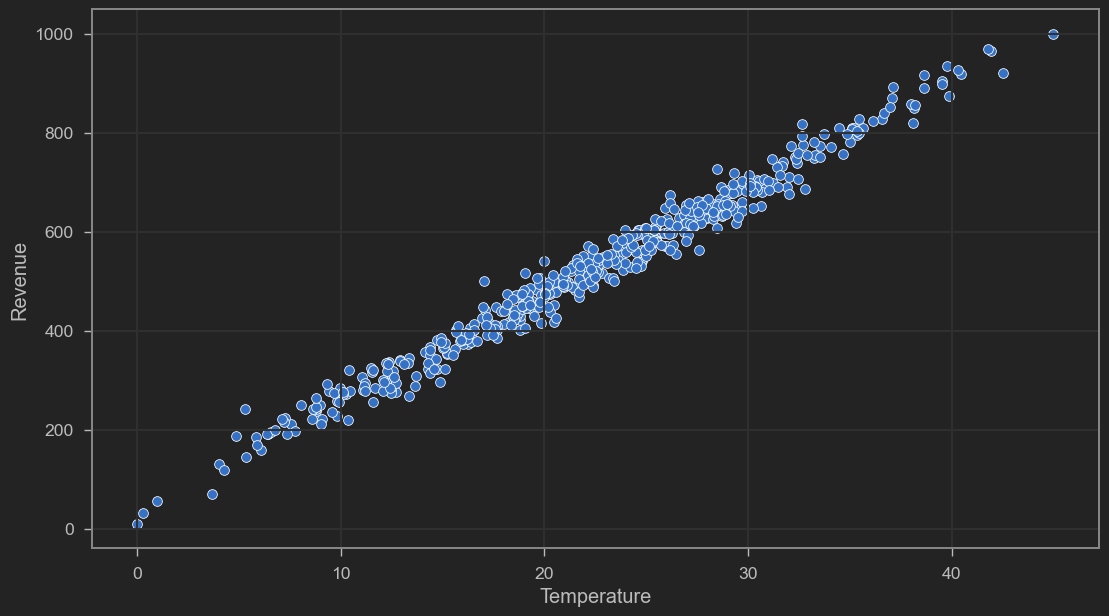

In [15]:
plt.figure(figsize = (13, 7))
sns.scatterplot(x = 'Temperature', y= 'Revenue', data = sales_df)
plt.grid()

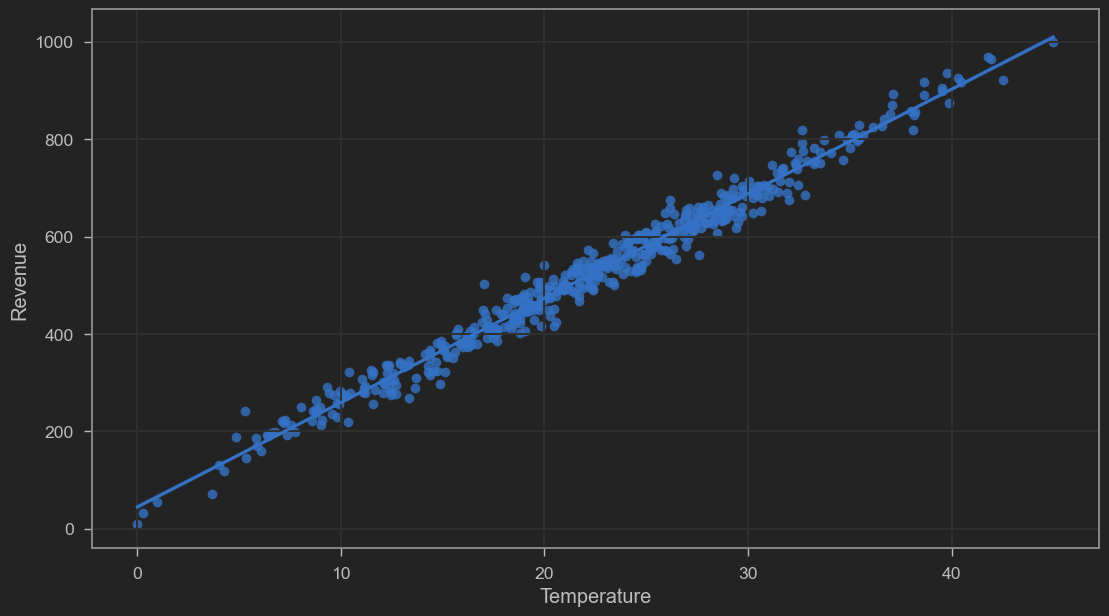

In [16]:
plt.figure(figsize = (13, 7))
sns.regplot(x = 'Temperature', y = 'Revenue', data = sales_df)
plt.grid()


## Creation d'un jeu de données de test et un autre d'entraitement


In [18]:
X = sales_df['Temperature']
Y = sales_df['Revenue']

In [19]:
X = np.array(X)
Y = np.array(Y)

In [20]:
X = X.reshape(-1,1)
print(X.shape)
Y = Y.reshape(-1,1)
print(Y.shape)


(500, 1)
(500, 1)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [22]:
X_train.shape

(400, 1)

In [23]:
Y_train.shape

(400, 1)

In [24]:
X_test.shape

(100, 1)

In [25]:
Y_test.shape

(100, 1)

## Entrainement du modèle 

In [26]:
from sklearn.linear_model import LinearRegression

SimpleLinearRegression = LinearRegression(fit_intercept = True)
SimpleLinearRegression.fit(X_train, Y_train)

LinearRegression()

In [27]:
print('Linear Model coeff(m)', SimpleLinearRegression.coef_)
print('Linear Model coeff(b)', SimpleLinearRegression.intercept_)

Linear Model coeff(m) [[21.33862458]]
Linear Model coeff(b) [47.64434284]


## Evaluation du modèle 

Text(0.5, 1.0, 'Revenue Generated vs Temperature')

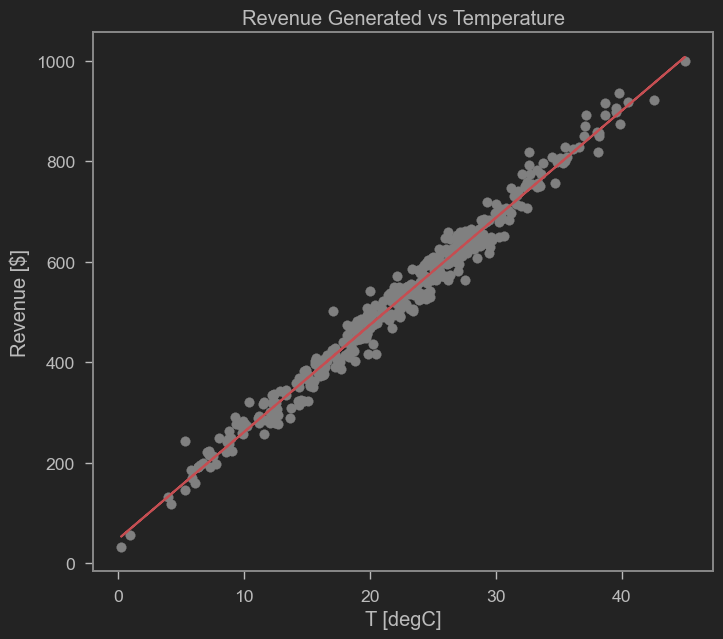

In [30]:
plt.scatter(X_train, Y_train, color = 'gray')
plt.plot(X_train, SimpleLinearRegression.predict(X_train),color = 'r')
plt.ylabel('Revenue [$]')
plt.xlabel('T [degC]')
plt.title('Revenue Generated vs Temperature')

In [31]:
accuracy_LinearRegression = SimpleLinearRegression.score(X_test, Y_test)
accuracy_LinearRegression

0.9740047140906091

## essaie du modèle pour prédire le revenue pour une température de 20°C 

In [35]:
Temp = np.array([20])
Temp = Temp.reshape(-1,1)
Revenue = SimpleLinearRegression.predict(Temp)
print('le revenue espéré est =',Revenue)

le revenue espéré est = [[474.41683448]]
